In [1]:
!pip install scikit-learn

In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


Number of rows after filtering: 145645


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22548\57461656.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['new&used'] = df['new&used'].replace({'New': 1, 'Used': 0})


0:	learn: 20367.9329019	total: 239ms	remaining: 1m 11s
50:	learn: 12371.9641920	total: 6.68s	remaining: 32.6s
100:	learn: 11830.6895853	total: 12.6s	remaining: 24.7s
150:	learn: 11469.8524335	total: 17.9s	remaining: 17.7s
200:	learn: 11349.6046518	total: 22.6s	remaining: 11.2s
250:	learn: 11198.3721816	total: 27.9s	remaining: 5.44s
299:	learn: 11047.9953883	total: 35.4s	remaining: 0us
MSE: 128333966.50145827
MAE: 5387.051688800048
R²: 0.7461402505828179
MAPE: 15.01%
RMSE: 11328.45825792099


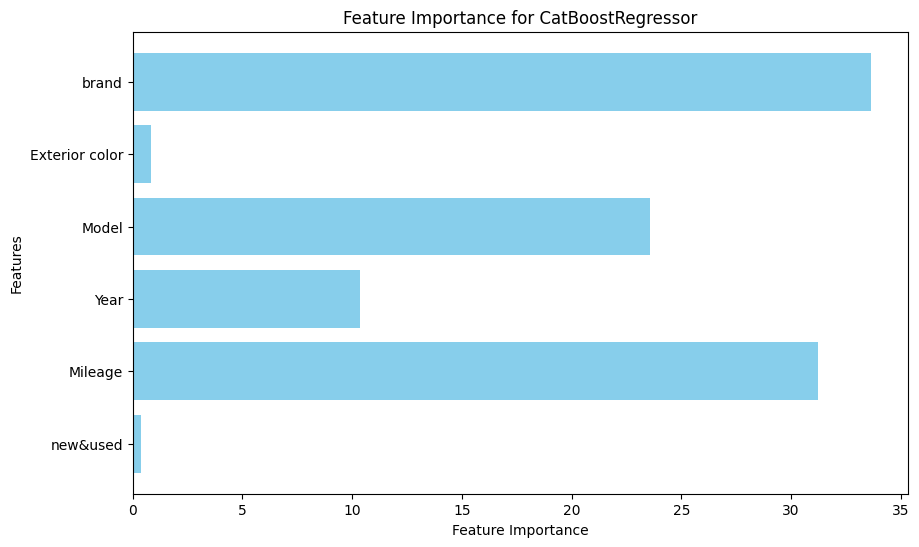

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from catboost import CatBoostRegressor, Pool

df = pd.read_csv("./data.csv")

df = df[df['new&used'].isin(['New', 'Used'])]
df = df[df['Fuel type'].isin(['Gasoline'])]

# Kiểm tra số lượng dòng sau khi lọc
print(f"Number of rows after filtering: {len(df)}")
if len(df) == 0:
    print("No data left after filtering, check the filtering conditions!")
else:
    df['new&used'] = df['new&used'].replace({'New': 1, 'Used': 0})
    cat_columns = [ 'brand', 'Exterior color', 'Model', 'new&used']

    # Chuyển đổi biến phân loại sang kiểu category
    for col in cat_columns:
        df[col] = df[col].astype("category")

    # Tiến hành phân chia dữ liệu
    train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

    x = ['brand', 'Exterior color', 'Model', 'Year', 'Mileage', 'new&used']
    y = 'money'
    x_train = train_data[x]
    y_train = train_data[y]
    x_test = test_data[x]
    y_test = test_data[y]
    
    # Tạo Pool dữ liệu train và test
    train_pool = Pool(data=x_train, label=y_train, cat_features=cat_columns)
    test_pool = Pool(data=x_test, cat_features=cat_columns)

    # Định nghĩa mô hình và tham số
    model = CatBoostRegressor(
        loss_function='RMSE',
        iterations=300,
        depth=4,
        learning_rate=0.2,
        l2_leaf_reg=1,
        boosting_type='Ordered',
        eval_metric='RMSE',
        verbose=50,
        early_stopping_rounds=50
    )

    # Huấn luyện mô hình
    model.fit(train_pool)

    # Dự đoán trên tập test
    preds = model.predict(test_pool)

    # Tính toán các chỉ số đánh giá
    mse_value = mean_squared_error(y_test, preds)
    rmse_value = np.sqrt(mse_value)
    mae_value = mean_absolute_error(y_test, preds)
    r2_value = r2_score(y_test, preds)
    mape = mean_absolute_percentage_error(y_test, preds) * 100

    # In kết quả
    print(f"MSE: {mse_value}")
    print(f"MAE: {mae_value}")
    print(f"R²: {r2_value}")
    print(f"MAPE: {mape:.2f}%")
    print(f"RMSE: {rmse_value}")
    # Lấy giá trị tầm quan trọng của các đặc trưng
    feature_importances = model.get_feature_importance(train_pool)
    feature_names = x_train.columns

    # Vẽ đồ thị
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importances, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Mức độ ảnh hưởng của các đặc trưng đến dự đoán giá xe')
    plt.gca().invert_yaxis()  # Đảo ngược trục y để đặc trưng quan trọng nhất ở trên cùng
    plt.show()  
   

In [17]:
 # Dự đoán cho một mẫu mới
    # i_name = input("Nhập tên xe: ")
# i_brand = input("Nhập thương hiệu xe: ")
# i_color = input("Nhập màu sắc ngoại thất: ")
# i_model = input("Nhập kiểu xe: ")
# i_year = int(input("Nhập năm sản xuất: "))
# i_mileage = int(input("Nhập số km đã đi: "))
# i_new_used = input("Nhập tình trạng xe (New/Used): ")

input_test = pd.DataFrame({
    'brand': ['Toyota','Volkswagen','Chevrolet'],
    'Exterior color': ['White', 'Platinum Gray Metallic', 'Black'],
    'Model': ['Corolla S','Tiguan 2.0T SE','Equinox 2Lt'],
    'Year': [2028,2025,2027],
    'Mileage': [2000,45070,0],
    'new&used': ['Used', 'Used', 'New']
})


predict_test = model.predict(input_test)
for i, pred in enumerate(predict_test):
    print(f"Dự đoán giá cho mẫu {i+1}: {pred:.18f} USD")

Dự đoán giá cho mẫu 1: 30011.955099910584976897 USD
Dự đoán giá cho mẫu 2: 21891.840365156080224551 USD
Dự đoán giá cho mẫu 3: 27003.270363779181934660 USD
